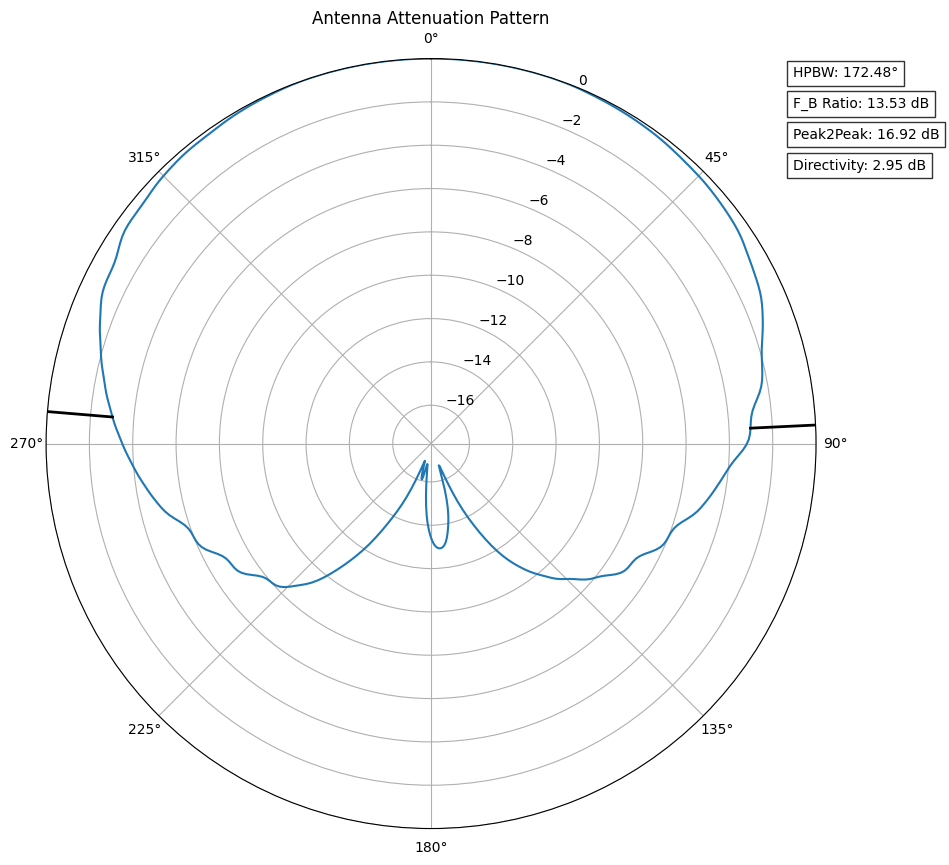

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from scipy.integrate import simpson
from scipy.ndimage import gaussian_filter1d

def load_and_visualize_file():
    root = tk.Tk()
    root.withdraw()  # Ocultar a janela principal do Tkinter

    file_path = filedialog.askopenfilename(title="Select an Antenna File", filetypes=[("Antenna files", "*.ant")])
    if file_path:
        # Lendo e convertendo dados do arquivo
        original_data = np.genfromtxt(file_path, delimiter="\n", converters={0: lambda s: float(s.decode("utf-8").replace(',', '.'))})
        
        # Número original de pontos
        original_points = len(original_data)
        original_azimutes = np.linspace(0, 360, original_points, endpoint=False)

        # Novos azimutes de 0 a 359 graus
        interpolated_azimutes = np.arange(0, 360)

        # Interpolação dos dados
        interpolated_data = np.interp(interpolated_azimutes, original_azimutes, original_data)

        # Aplicando suavização gaussiana
        smoothed_data = gaussian_filter1d(interpolated_data, sigma=2)  # O valor de sigma pode ser ajustado conforme necessário

        # Visualizando os dados no gráfico polar
        visualize_data(smoothed_data)


def calculate_directivity(smoothed_data):
    # Converter atenuação em dB para potência relativa
    power_relative = 10 ** (smoothed_data/ 10)
    # Normalizar a potência
    power_normalized = power_relative / np.max(power_relative)
    # Converter azimutes de graus para radianos
    azimutes = np.linspace(0, 2 * np.pi, len(smoothed_data))
    # Integrar a potência normalizada sobre todos os ângulos, usando argumentos de palavras-chave
    integral = simpson(y=power_normalized, x=azimutes)
    # Calcular diretividade
    directivity = 2 * np.pi / integral  # Correção aplicando 2*pi para considerar a integral sobre o círculo completo
    # Converter diretividade para dB
    directivity_dB = 10 * np.log10(directivity)
    return directivity_dB

def visualize_data(smoothed_data):
    # Converter azimutes de graus para radianos
    azimutes = np.linspace(0, 2 * np.pi, len(smoothed_data))
    # Configurar o gráfico polar
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)
    ax.plot(azimutes, smoothed_data, label='Attenuation Pattern')

    # Adicionar cálculos e legendas de HPBW e Front Back Ratio
    threshold = -3
    indices = np.where(smoothed_data <= threshold)[0]
    if len(indices) > 1:
        idx_first = indices[0]
        idx_last = indices[-1]
        ax.plot([azimutes[idx_first], azimutes[idx_first]], [0, smoothed_data[idx_first]], 'k-', linewidth=2)
        ax.plot([azimutes[idx_last], azimutes[idx_last]], [0, smoothed_data[idx_last]], 'k-', linewidth=2)
        angle_first_deg = np.degrees(azimutes[idx_first])
        angle_last_deg = np.degrees(azimutes[idx_last])
        hpbw = 360 - angle_last_deg + angle_first_deg
        ax.text(0.97, 0.99, f'HPBW: {hpbw:.2f}°', transform=ax.transAxes, horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
        front_attenuation = smoothed_data[np.argmin(np.abs(azimutes - 0))]
        back_attenuation = smoothed_data[np.argmin(np.abs(azimutes - np.pi))]
        fbr = front_attenuation - back_attenuation
        ax.text(0.97, 0.95, f'F_B Ratio: {fbr:.2f} dB', transform=ax.transAxes, horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
     # Calcular e adicionar legenda de Peak-to-Peak
    peak_to_peak_db = np.ptp(smoothed_data)  # ptp() retorna a diferença entre o máximo e o mínimo
    ax.text(0.97, 0.91, f'Peak2Peak: {peak_to_peak_db:.2f} dB', transform=ax.transAxes, horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    # Calcular e adicionar legenda de diretividade
    directivity_dB = calculate_directivity(smoothed_data)
    ax.text(0.97, 0.87, f'Directivity: {directivity_dB:.2f} dB', transform=ax.transAxes, horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    # Configurações adicionais do gráfico
    ax.set_theta_zero_location('N')  # Norte como 0 graus
    ax.set_theta_direction(-1)  # Direção horária
    ax.set_title('Antenna Attenuation Pattern')
    ax.grid(True)
    plt.show()

load_and_visualize_file()



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from scipy.integrate import simpson
from scipy.ndimage import gaussian_filter1d

def load_and_visualize_file():
    root = tk.Tk()
    root.withdraw()  # Ocultar a janela principal do Tkinter

    file_path = filedialog.askopenfilename(title="Select an Antenna File", filetypes=[("Antenna files", "*.ant")])
    if file_path:
        # Lendo e convertendo dados do arquivo
        original_data = np.genfromtxt(file_path, delimiter="\n", converters={0: lambda s: float(s.decode("utf-8").replace(',', '.'))})
        
        # Número original de pontos
        original_points = len(original_data)
        original_azimutes = np.linspace(0, 360, original_points, endpoint=False)

        # Novos azimutes de 0 a 359 graus
        interpolated_azimutes = np.arange(0, 360)

        # Interpolação dos dados
        interpolated_data = np.interp(interpolated_azimutes, original_azimutes, original_data)

        # Aplicando suavização gaussiana
        smoothed_data = gaussian_filter1d(interpolated_data, sigma=2)  # O valor de sigma pode ser ajustado conforme necessário

        # Visualizando os dados no gráfico polar
        visualize_data(smoothed_data)


def calculate_directivity(smoothed_data):
    # Converter atenuação em dB para potência relativa
    power_relative = 10 ** (smoothed_data/ 10)
    # Normalizar a potência
    power_normalized = power_relative / np.max(power_relative)
    # Converter azimutes de graus para radianos
    azimutes = np.linspace(0, 2 * np.pi, len(smoothed_data))
    # Integrar a potência normalizada sobre todos os ângulos, usando argumentos de palavras-chave
    integral = simpson(y=power_normalized, x=azimutes)
    # Calcular diretividade
    directivity = 2 * np.pi / integral  # Correção aplicando 2*pi para considerar a integral sobre o círculo completo
    # Converter diretividade para dB
    directivity_dB = 10 * np.log10(directivity)
    return directivity_dB

def visualize_data(smoothed_data):
    # Converter azimutes de graus para radianos
    azimutes = np.linspace(0, 2 * np.pi, len(smoothed_data))
    # Configurar o gráfico polar
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)
    ax.plot(azimutes, smoothed_data, label='Attenuation Pattern')

    # Adicionar cálculos e legendas de HPBW e Front Back Ratio
    threshold = -3
    indices = np.where(smoothed_data <= threshold)[0]
    if len(indices) > 1:
        idx_first = indices[0]
        idx_last = indices[-1]
        ax.plot([azimutes[idx_first], azimutes[idx_first]], [0, smoothed_data[idx_first]], 'k-', linewidth=2)
        ax.plot([azimutes[idx_last], azimutes[idx_last]], [0, smoothed_data[idx_last]], 'k-', linewidth=2)
        angle_first_deg = np.degrees(azimutes[idx_first])
        angle_last_deg = np.degrees(azimutes[idx_last])
        hpbw = 360 - angle_last_deg + angle_first_deg
        ax.text(0.97, 0.99, f'HPBW: {hpbw:.2f}°', transform=ax.transAxes, horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
        front_attenuation = smoothed_data[np.argmin(np.abs(azimutes - 0))]
        back_attenuation = smoothed_data[np.argmin(np.abs(azimutes - np.pi))]
        fbr = front_attenuation - back_attenuation
        ax.text(0.97, 0.95, f'F_B Ratio: {fbr:.2f} dB', transform=ax.transAxes, horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
     # Calcular e adicionar legenda de Peak-to-Peak
    peak_to_peak_db = np.ptp(smoothed_data)  # ptp() retorna a diferença entre o máximo e o mínimo
    ax.text(0.97, 0.91, f'Peak2Peak: {peak_to_peak_db:.2f} dB', transform=ax.transAxes, horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    # Calcular e adicionar legenda de diretividade
    directivity_dB = calculate_directivity(smoothed_data)
    ax.text(0.97, 0.87, f'Directivity: {directivity_dB:.2f} dB', transform=ax.transAxes, horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    # Configurações adicionais do gráfico
    ax.set_theta_zero_location('N')  # Norte como 0 graus
    ax.set_theta_direction(-1)  # Direção horária
    ax.set_title('Antenna Attenuation Pattern')
    ax.grid(True)
    plt.show()

load_and_visualize_file()



KeyboardInterrupt: 

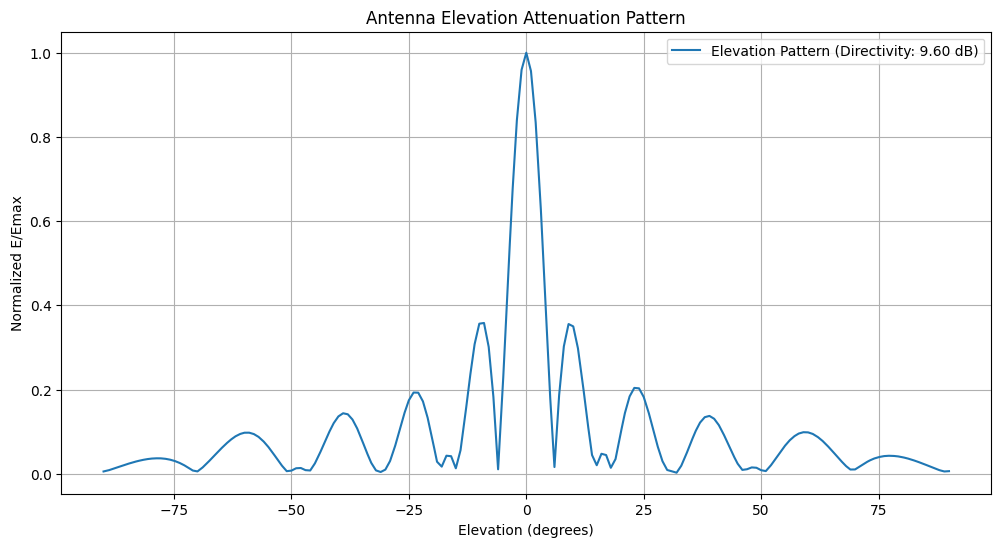

[0.0056  0.00585 0.0061  ... 0.00616 0.00623 0.0063 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from scipy.integrate import simpson

def calculate_directivity(data, angles):   

    power_normalized = data / np.max(data)
    # Converter ângulos de graus para radianos
    radians = np.deg2rad(angles)
    # Integrar a potência normalizada sobre os ângulos, usando argumentos nomeados
    integral = simpson(y=power_normalized, x=radians)
    # Calcular diretividade
    directivity = np.pi / integral  # Usando π já que os dados cobrem apenas um semi-círculo
    # Converter diretividade para dB
    directivity_dB = 10 * np.log10(directivity)
    return directivity_dB

def load_and_visualize_file():
    root = tk.Tk()
    root.withdraw()  # Ocultar a janela principal do Tkinter

    file_path = filedialog.askopenfilename(title="Select an Antenna File", filetypes=[("Antenna files", "*.pat")])
    if file_path:
        # Converter vírgulas para pontos e carregar os dados
        try:
            # Ler o arquivo inteiro como uma string
            with open(file_path, 'r') as file:
                data_string = file.read().replace(',', '.')
            
            # Converter string para array NumPy
            data = np.fromstring(data_string, sep='\n', dtype=float)
            
            # Gerar ângulos para interpolação
            angles = np.linspace(-90, 90, len(data), endpoint=True)
            new_angles = np.arange(-90, 90.1, 0.1)
            interpolated_data = np.interp(new_angles, angles, data)
            
        except Exception as e:
            print(f"Error reading the file: {e}")
            return  # Sair da função se houver erro ao ler o arquivo

        # Calcular diretividade
        directivity_dB = calculate_directivity(interpolated_data, new_angles)

        # Visualizando os dados no gráfico retangular
        visualize_data(new_angles, interpolated_data, directivity_dB)

def visualize_data(angles, data, directivity_dB):
    plt.figure(figsize=(12, 6))
    plt.plot(angles, data, label=f'Elevation Pattern (Directivity: {directivity_dB:.2f} dB)')
    plt.xlabel('Elevation (degrees)')
    plt.ylabel('Normalized E/Emax')
    plt.title('Antenna Elevation Attenuation Pattern')
    plt.grid(True)
    plt.legend()
    plt.show()
    print(len(data))
    print(len(angles))

    
load_and_visualize_file()


